In [ ]:
import os
os._exit(00)

In [16]:
import sys
sys.path.insert(0, '../CAFE')
sys.path.insert(0, '../CRETA')

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
import matplotlib.ticker
from matplotlib.backends.backend_pdf import PdfPages

import creta
import cafe_io
from cafe_io import *
import cafe_helper
from cafe_helper import *
import cafe

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [17]:
# SPECTRAL EXTRACTION

In [18]:
# Read parameter file with extraction keywords
creta_dir = '../CRETA/'
pf = open(creta_dir+'param_files/NGC7469_single_params.txt','r')
print(pf.read())
pf.close()

cubes = g140h, g235h, g395h, ch1-short, ch1-medium, ch1-long, ch2-short, ch2-medium, ch2-long, ch3-short, ch3-medium, ch3-long, ch4-short, ch4-medium, ch4-long
user_r_ap = 0.3                 # [arcsec] Aperture size
user_ra = 23h03m15.614s         # RA of the extraction location
user_dec = 08d52m26.23s         # Dec of the extraction location
point_source = False            # [True/False] True = Cone extraction. False = Cylinder extraction
lambda_ap = 5.4                 # [microns] The user-specified aperture size (user_r_ap) will be defined at this wavelength (ignored if point_source=False; cylinder extraction)
aperture_correction = False     # [True/False]
centering = True                # [True/False] At lambda_cent, this will update user_ra,user_dec to recenter the extraction location  
lambda_cent = 5.4               # [microns] The wavelength at which to perform the centering (ignored if centering=False)
background_sub = False          # [True/False]
r_ann_in = 0.0             

In [19]:
# Load the extraction tool (CRETA)
c = creta.creta(creta_dir)

CAFE Region Extraction Tool Automaton (CRETA) initialized


In [5]:
# Perform the extraction
c.singleExtraction(parameter_file=True, perband_cent=True, parfile_name='NGC7469_single_params.txt', data_path='../CRETA/data/NGC7469/', output_filebase_name='NGC7469')

User API Created
PSFs: ../CRETA/PSFs/
Data: ../CRETA/data/NGC7469/
########################################
     Load User Parameters 
########################################
Cubes: ['g140h', 'g235h', 'g395h', 'ch1-short', 'ch1-medium', 'ch1-long', 'ch2-short', 'ch2-medium', 'ch2-long', 'ch3-short', 'ch3-medium', 'ch3-long', 'ch4-short', 'ch4-medium', 'ch4-long']
Aperture radii: [0.3] (arcsec)
RA,δ: [345.81505833,8.87395278] (degrees)
Point Source: False
Aperture Correction: False (PSF Correction)
Centering: True
Centering lambda: 5.4μm
Background Subtraction: False
PSF sub-cubes Path: ../CRETA/PSFs/
Data sub-cubes Path: ../CRETA/data/NGC7469/
########################################
Loading Data
Load file: ../CRETA/data/NGC7469/Level3_g140h-f100lp_s3d.fits
Load file: ../CRETA/data/NGC7469/Level3_g235h-f170lp_s3d.fits
Load file: ../CRETA/data/NGC7469/Level3_g395h-f290lp_s3d.fits
Load file: ../CRETA/data/NGC7469/bandcube_ch1-short_s3d.fits
Load file: ../CRETA/data/NGC7469/bandcube_ch1-

Centering around 5.399500119092409 um in cube ch1_SHORT
Old coordinates were: 345.81505833 8.87395278
New coordinates are: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81505833, 8.87395278)>
Per-band re-centering around 0.9704062933143935 um in cube G140H


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81526723, 8.87393467)>
Per-band re-centering around 1.660691434380468 um in cube G235H


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81524248, 8.87393663)>
Per-band re-centering around 2.871215809167602 um in cube G395H


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81524207, 8.87392658)>
Per-band re-centering around 4.902500095486175 um in cube ch1_SHORT


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81505874, 8.87393501)>
Per-band re-centering around 5.662499847530853 um in cube ch1_MEDIUM


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81506329, 8.87392821)>
Per-band re-centering around 6.532500209927093 um in cube ch1_LONG


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81506107, 8.87393765)>
Per-band re-centering around 7.515000229119323 um in cube ch2_SHORT


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81505866, 8.87393817)>
Per-band re-centering around 8.675000076531433 um in cube ch2_MEDIUM


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81505679, 8.87394853)>
Per-band re-centering around 10.02500045800116 um in cube ch2_LONG


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81506524, 8.87393436)>
Per-band re-centering around 11.557500190800054 um in cube ch3_SHORT


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81506616, 8.87392467)>
Per-band re-centering around 13.347500152653083 um in cube ch3_MEDIUM


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81506916, 8.87392202)>
Per-band re-centering around 15.417499847477304 um in cube ch3_LONG


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81506453, 8.87393263)>
Per-band re-centering around 17.71500076306984 um in cube ch4_SHORT


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81506695, 8.87393001)>
Per-band re-centering around 20.705000534188 um in cube ch4_MEDIUM


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81505906, 8.87393121)>
Per-band re-centering around 24.205000534188 um in cube ch4_LONG


New re-centered coordinates: <SkyCoord (ICRS): (ra, dec) in deg
    (345.81503673, 8.87389218)>
G140H photometry exectued in: 3.9788200855255127 seconds
G235H photometry exectued in: 3.7253410816192627 seconds
G395H photometry exectued in: 3.5860159397125244 seconds
ch1_SHORT photometry exectued in: 0.807833194732666 seconds
ch1_MEDIUM photometry exectued in: 0.9122123718261719 seconds
ch1_LONG photometry exectued in: 1.1752510070800781 seconds
ch2_SHORT photometry exectued in: 0.5933899879455566 seconds
ch2_MEDIUM photometry exectued in: 0.7749843597412109 seconds
ch2_LONG photometry exectued in: 0.7725749015808105 seconds
ch3_SHORT photometry exectued in: 0.5933670997619629 seconds
ch3_MEDIUM photometry exectued in: 0.6768491268157959 seconds
ch3_LONG photometry exectued in: 0.7827513217926025 seconds
ch4_SHORT photometry exectued in: 0.5282351970672607 seconds
ch4_MEDIUM photometry exectued in: 0.8659861087799072 seconds
ch4_LONG photometry exectued in: 0.70501708984375 seconds
Phot

In [6]:
# CAFE FITTING

In [20]:
# Setup directories
source_fd = '../CRETA/extractions/'
source_fn = 'NGC7469_SingleExt_r0.3as_cube.fits'
source_fnb = source_fn.split('.fits')[0].replace('.','')

cafe_dir = '../CAFE/'
inppar_fn = cafe_dir+'inp_parfiles/inpars_jwst_nirspec-miri_AGN.ini'
optpar_fn = cafe_dir+'opt_parfiles/default_opt.cafe'

z=0.01630

In [21]:
s = cafe.specmod(cafe_dir)

In [22]:
s.read_spec(source_fn, file_dir=source_fd, z=z)

Load data: ../CRETA/extractions/NGC7469_SingleExt_r0.3as_cube.fits
Filename: ../CRETA/extractions/NGC7469_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (20624,)   float64   
  2  ERR           1 ImageHDU         7   (20624,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (20624,)   float64   
  4  ERR_ST        1 ImageHDU         7   (20624,)   float64   
  5  DQ            1 ImageHDU         7   (20624,)   float64   
  6  WAVE          1 ImageHDU         7   (20624,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   20624R x 1C   [20A]   


Generating continuum profiles for guess model
Parameter object has 126 lines, 29 PAHs, 4 opacity features, and 42 continuum parameters
AGN
AGN
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
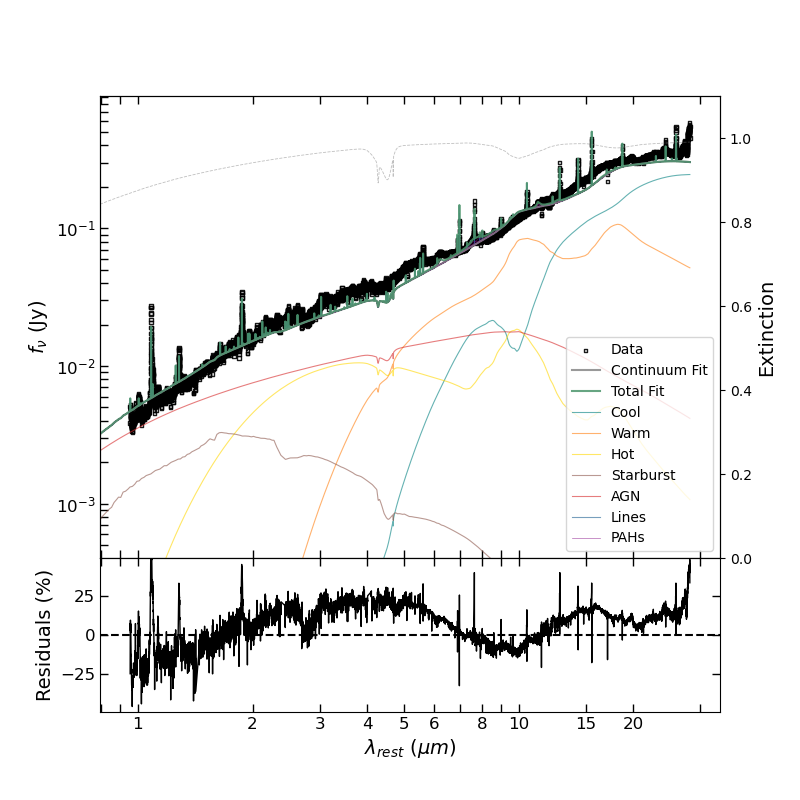

In [23]:
s.plot_spec_ini(inppar_fn, optpar_fn)

In [24]:
s.fit_spec(inppar_fn, optpar_fn)

Generating parameter object
Parameter object has 126 lines, 29 PAHs, 4 opacity features, and 42 continuum parameters
Generating continuum profiles
AGN
AGN
ISRF
ISRF
5.05 seconds to make continnum profiles
Generating parameter cube
Fitting 511 parameters
Iteration 1/5(max): 2023-01-07 00:14:40.065965 -----------------
True in 40 steps
314.32 seconds elapsed
<Parameter 'DSK_FLX', value=2.934305240863834e-11 +/- 0.00899, bounds=[0.0:2.0]> at lower bound, fixing to 0.0
<Parameter 'g_Paschen63_10941B_Gamma', value=0.006671114076050699 +/- 0.000487, bounds=[0.000431075686423192:0.0066711140760507]> at upper bound, fixing to 0.0066711140760507
<Parameter 'g_Paschen53_12822B_Gamma', value=0.006671114076050699 +/- 0.000297, bounds=[0.0003657292645975759:0.0066711140760507]> at upper bound, fixing to 0.0066711140760507
<Parameter 'g_Paschen43_18756B_Gamma', value=0.006671114076050699 +/- 0.000213, bounds=[0.0004325502202656655:0.0066711140760507]> at upper bound, fixing to 0.0066711140760507
<Pa

In [25]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

-14.990905923543115
-5.0003021759650155e-05


AGN
AGN
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


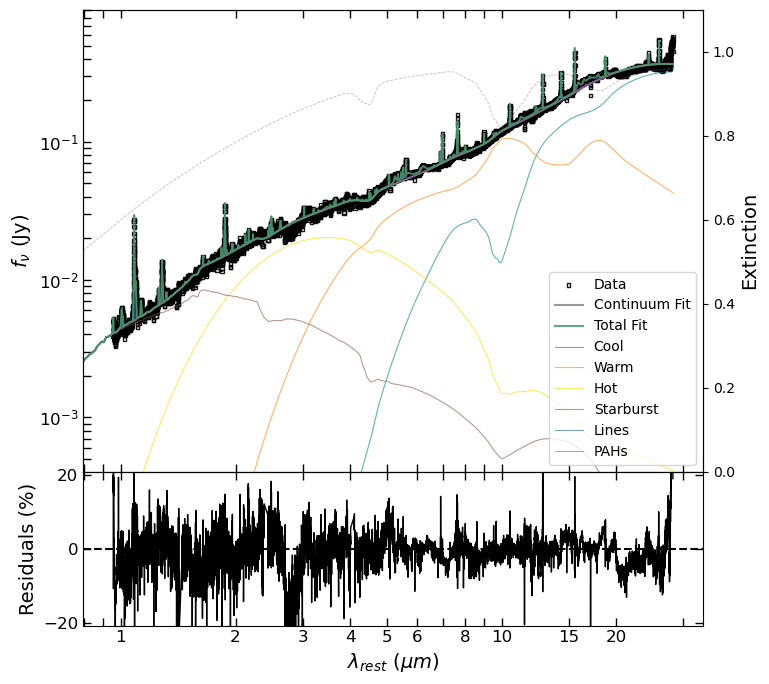

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
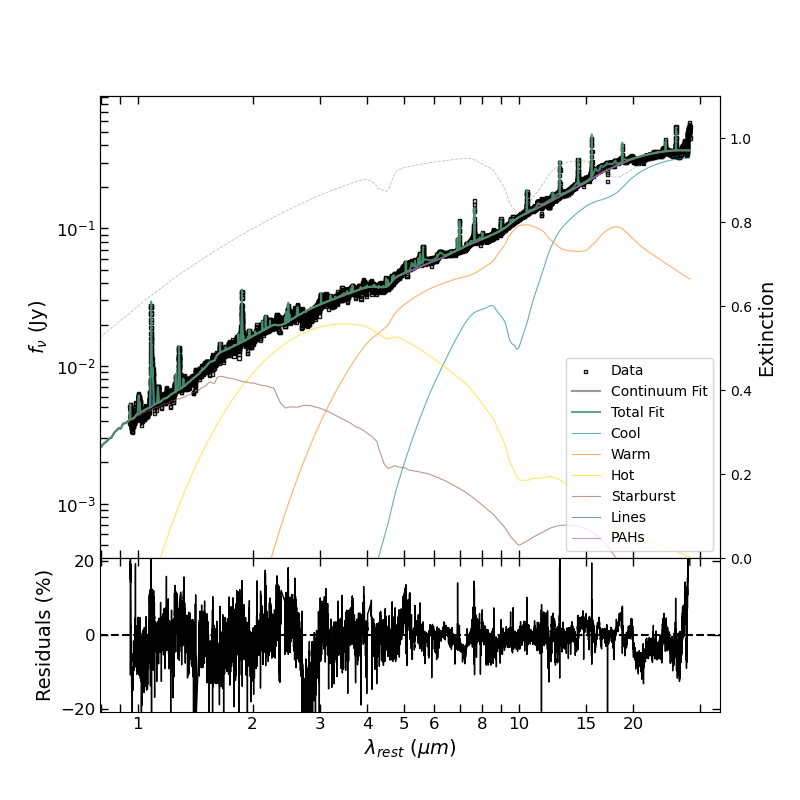

In [26]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [27]:
# Load the parameter cube from drive
parcube_fd = '../CAFE/output/'+source_fnb+'/'
parcube_fn = source_fnb+'_parcube.fits'

In [28]:
s.read_spec(source_fn, file_dir=source_fd, z=z)

Load data: ../CRETA/extractions/NGC7469_SingleExt_r0.3as_cube.fits
Filename: ../CRETA/extractions/NGC7469_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (20624,)   float64   
  2  ERR           1 ImageHDU         7   (20624,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (20624,)   float64   
  4  ERR_ST        1 ImageHDU         7   (20624,)   float64   
  5  DQ            1 ImageHDU         7   (20624,)   float64   
  6  WAVE          1 ImageHDU         7   (20624,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   20624R x 1C   [20A]   


In [29]:
s.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../CAFE/output/NGC7469_SingleExt_r03as_cube/NGC7469_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 511)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 511)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 511)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 511)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 511)   float64   
  6  EXPR          1 BinTableHDU     13   511R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   511R x 2C   [I, 32A]   


In [30]:
from astropy.io import ascii
from astropy.table import Table
from astropy.table import QTable

# Read output PAH table
pah = cafeio.pah_table(s.parcube, 0, 0)
# Read output line table
line = cafeio.line_table(s.parcube, 0, 0)

pah62 = pah[pah.index == 'PAH62'].pah_strength.values[0]
pah62_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah77 = pah[pah.index == 'PAH77_C'].pah_strength.values[0]
pah77_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah113 = pah[pah.index == 'PAH113_C'].pah_strength.values[0]
pah113_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]

x = pah62 / pah77 
x_unc = pah62 / pah77 * np.sqrt((pah62_unc/pah62)**2 + (pah77_unc/pah77)**2)
y = pah113 / pah77
y_unc = pah113 / pah77 * np.sqrt((pah113_unc/pah113)**2 + (pah77_unc/pah77)**2)

print('6.2/7.7 = {} +/- {}'.format(x, x_unc))
print('11.3/7.7 = {} +/- {}'.format(y, y_unc))

print(pah)

# Make an astropy table 
t = QTable([pah.index.values, pah.pah_strength, pah.pah_strength_unc],
           names = ('pah_complex', 'pah_strength', 'pah_strength_unc'),
           meta={'wavelength': 'micron',
                 'flux': 'W/m^2',
                }
          )

# Write PAH table in an .ecsv file
#t.write('./NGC7469_pah_tbl.ecsv', overwrite=False)

/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufu

6.2/7.7 = 1.3880363104697235 +/- 0.10324166181217186
11.3/7.7 = 1.0013177027146338 +/- 0.08540260374841684
             pah_strength  pah_strength_unc
pah_complex                                
PAH113_C     1.065369e-19      1.036621e-20
PAH120       5.338336e-20      9.416703e-21
PAH126_C     1.430245e-19      1.260815e-20
PAH136       0.000000e+00      0.000000e+00
PAH142       1.177408e-19      7.437818e-21
PAH164       8.618155e-20      3.416383e-21
PAH170_C     5.843914e-19      1.835059e-20
PAH33        0.000000e+00      0.000000e+00
PAH62        1.476824e-19      6.420931e-21
PAH77_C      1.063967e-19      1.780275e-20
PAH83        0.000000e+00      0.000000e+00
PAH86        0.000000e+00      0.000000e+00
ali34        0.000000e+00      0.000000e+00
ali345       5.178915e-20      9.143394e-21
